svm 在解决小样本、非线性及高维模式识别中都表现出了许多独特的优势。同时，其不仅可以应用于线性分布数据，还可以用于非线性分布数据。相比于其他基本机器学习分类算法如逻辑回归、KNN、朴素贝叶斯等，其最终效果的表现一般都会优于这些方法。

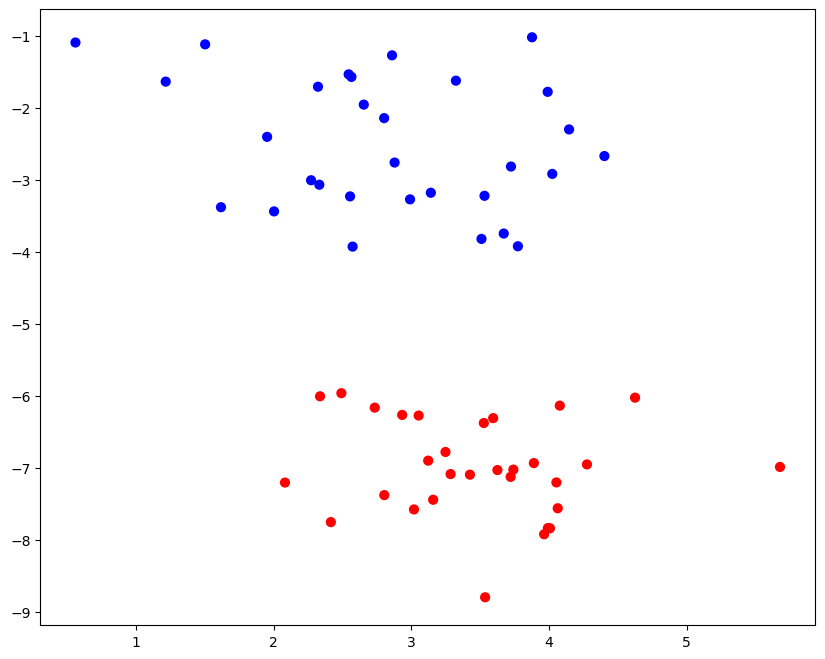

In [1]:
## 1 完美线性可分

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

x, y = make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8)  # 生成示例数据,团状数据

plt.figure(figsize=(10, 8))  # 绘图
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

主要的参数如下：

    C: 支持向量机中对应的惩罚参数。

    kernel: 核函数，linear, poly, rbf, sigmoid, precomputed 可选，下文详细介绍。

    degree: poly 多项式核函数的指数。

    tol: 收敛停止的容许值。

In [2]:
from sklearn.svm import SVC

linear_svc = SVC(kernel="linear")
linear_svc.fit(x, y)

SVC(kernel='linear')

In [3]:
linear_svc.support_vectors_

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

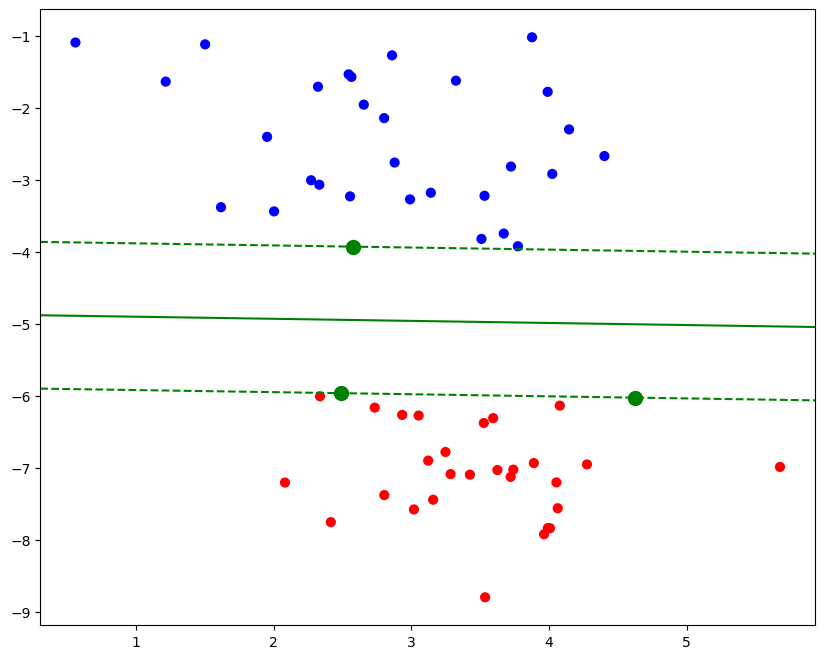

In [4]:
import numpy as np
def svc_plot(model):
    # 获取到当前 Axes 子图数据，并为绘制分割线做准备
    ax = plt.gca() #获取当前图形上的坐标轴实例
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)    #根据一组一维数据生成N维矩阵网格
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 使用轮廓线方法绘制分割线
    ax.contour(X, Y, P, colors="green", levels=[-1, 0, 1], linestyles=["--", "-", "--"])

    # 标记出支持向量的位置
    ax.scatter(
        model.support_vectors_[:, 0], model.support_vectors_[:, 1], c="green", s=100
    )

# 绘制最大间隔支持向量图
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)

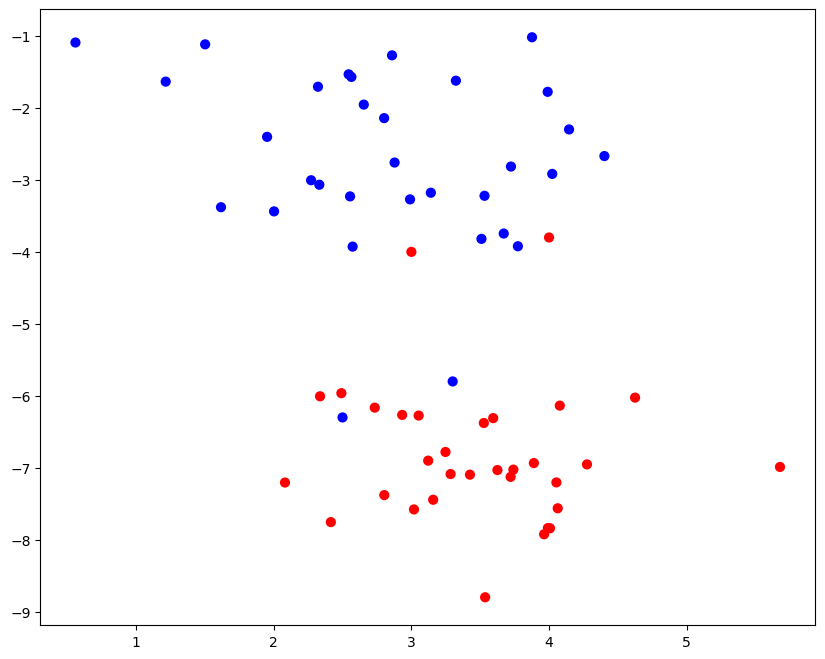

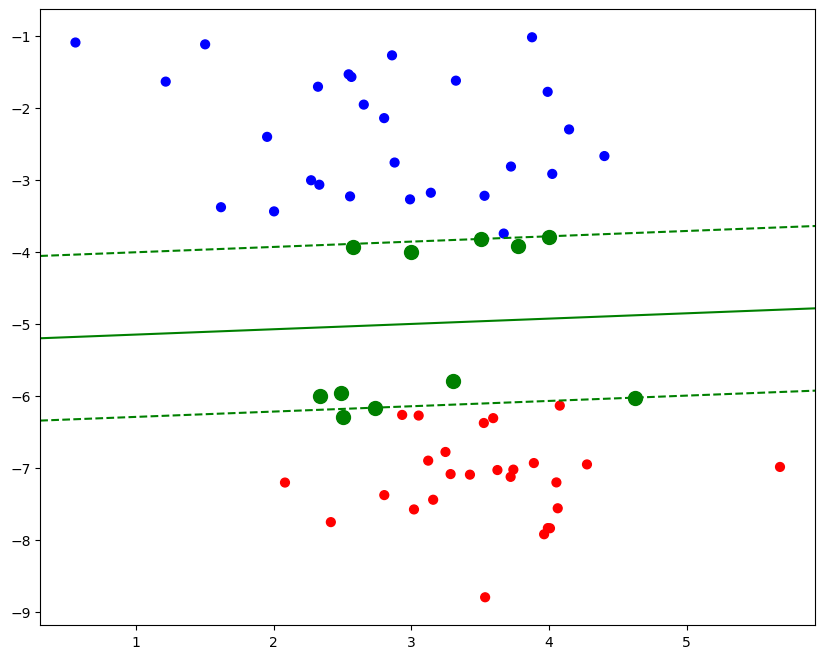

In [5]:
## 2 近似线性可分

# 向原数据集中加入噪声点
x = np.concatenate((x, np.array([[3, -4], [4, -3.8], [2.5, -6.3], [3.3, -5.8]])))
y = np.concatenate((y, np.array([1, 1, 0, 0])))

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")

linear_svc.fit(x, y)  # 训练

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
svc_plot(linear_svc)

In [6]:
from ipywidgets import interact
import ipywidgets as widgets


def change_c(c):
    linear_svc.C = c
    linear_svc.fit(x, y)
    plt.figure(figsize=(10, 8))
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap="bwr")
    svc_plot(linear_svc)


interact(change_c, c=[1, 10000, 1000000])

interactive(children=(Dropdown(description='c', options=(1, 10000, 1000000), value=1), Output()), _dom_classes…

<function __main__.change_c(c)>

## 非线性分类支持向量机

对于线性不可分的数据集，我们也可以通过支持向量机去完成分类。但是，这里需要增加一个技巧把线性不可分数据转换为线性可分数据之后，再完成分类。

我们把这种数据转换的技巧称作「核技巧」，实现数据转换的函数称之为「核函数」。

核技巧的关键在于空间映射，即将低维数据映射到高维空间中，使得数据集在高维空间能被线性可分。

这里需要补充说明一点，那就是将数据点从低维度空间转换到高维度空间的方法有很多，但往往涉及到庞大的计算量，而数学家们从中发现了几种特殊的函数，这类函数能大大降低计算的复杂度，于是被命名为「核函数」。也就是说，核技巧是一种特殊的「映射」技巧，而核函数是核技巧的实现方法。

我们通过直接引入核函数 k(xi,xj)，而不需要显式的定义高维特征空间和映射函数，就可以利用解线性分类问题的方法来求解非线性分类问题的支持向量机。

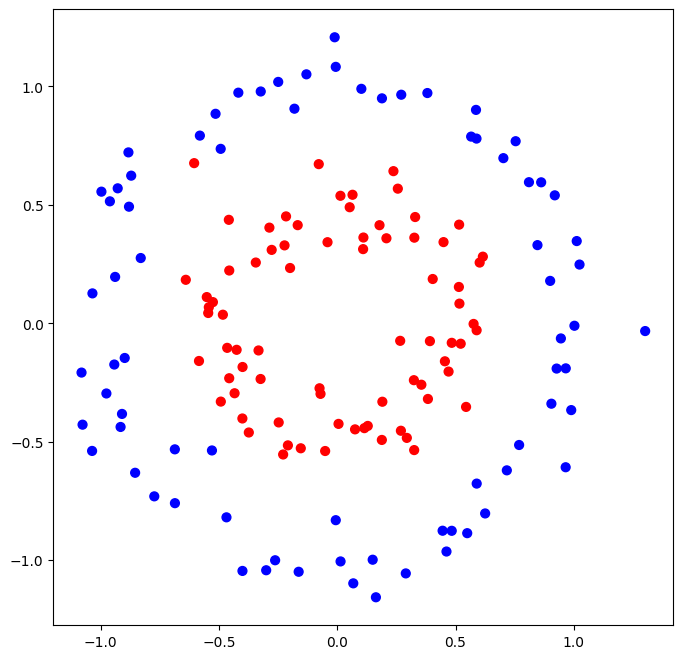

In [7]:
from sklearn.datasets import make_circles

x2, y2 = make_circles(150, factor=0.5, noise=0.1, random_state=30)  # 生成示例数据

plt.figure(figsize=(8, 8))  # 绘图
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

Text(0.5, 0, 'r')

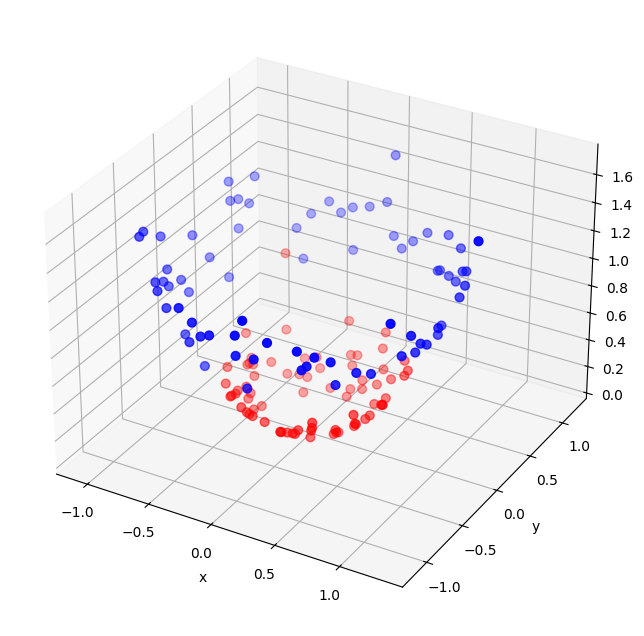

In [9]:
def kernel_function(xi, xj):
    poly = xi**2 + xj**2
    return poly

r = kernel_function(x2[:, 0], x2[:, 1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection="3d")
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap="bwr")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("r")

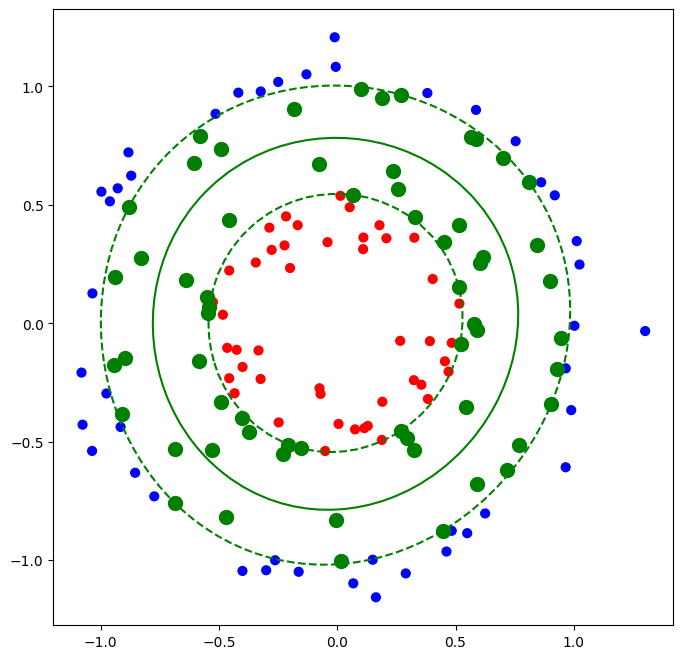

In [10]:
rbf_svc = SVC(kernel="rbf", gamma="auto")
rbf_svc.fit(x2, y2)

plt.figure(figsize=(8, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap="bwr")

svc_plot(rbf_svc)

## 多分类支持向量机

支持向量机最初是为二分类问题设计的，当我们面对多分类问题时，其实同样可以使用支持向量机解决。而解决的方法就是通过组合多个二分类器来实现多分类器的构造。根据构造的方式又分为 2 种方法：

一对多法：即训练时依次把某个类别的样本归为一类，剩余的样本归为另一类，这样 k 个类别的样本就构造出了 k 个支持向量机。

一对一法：即在任意两类样本之间构造一个支持向量机，因此 k 个类别的样本就需要设计 k(k-1)/2个支持向量机。

而在 scikit-learn，实现多分类支持向量机通过设定参数 decision_function_shape 来确定，其中：

    decision_function_shape='ovo'：代表一对一法。

    decision_function_shape='ovr'：代表一对多法。


最后，我们总结一下 SVM 的优点和缺点。首先，SVM 是一种表现非常不错的方法，尤其是对于非线性分类问题。而且最大的劣势在于计算效率，随着数据集的增大，计算时间陡增。所以，一般我们会在小数据集下应用 SVM，而大数据集基本不予考虑。